# Set Up

In [9]:
#load packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [10]:
#set paths
current_directory = os.getcwd()
base_dir = f'{os.path.dirname(current_directory)}/'
data_dir = f'{base_dir}Source_Data/'
fig_dir = f'{base_dir}/figures/'

## Figure S4

/Users/jamiel12/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jamiel12/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


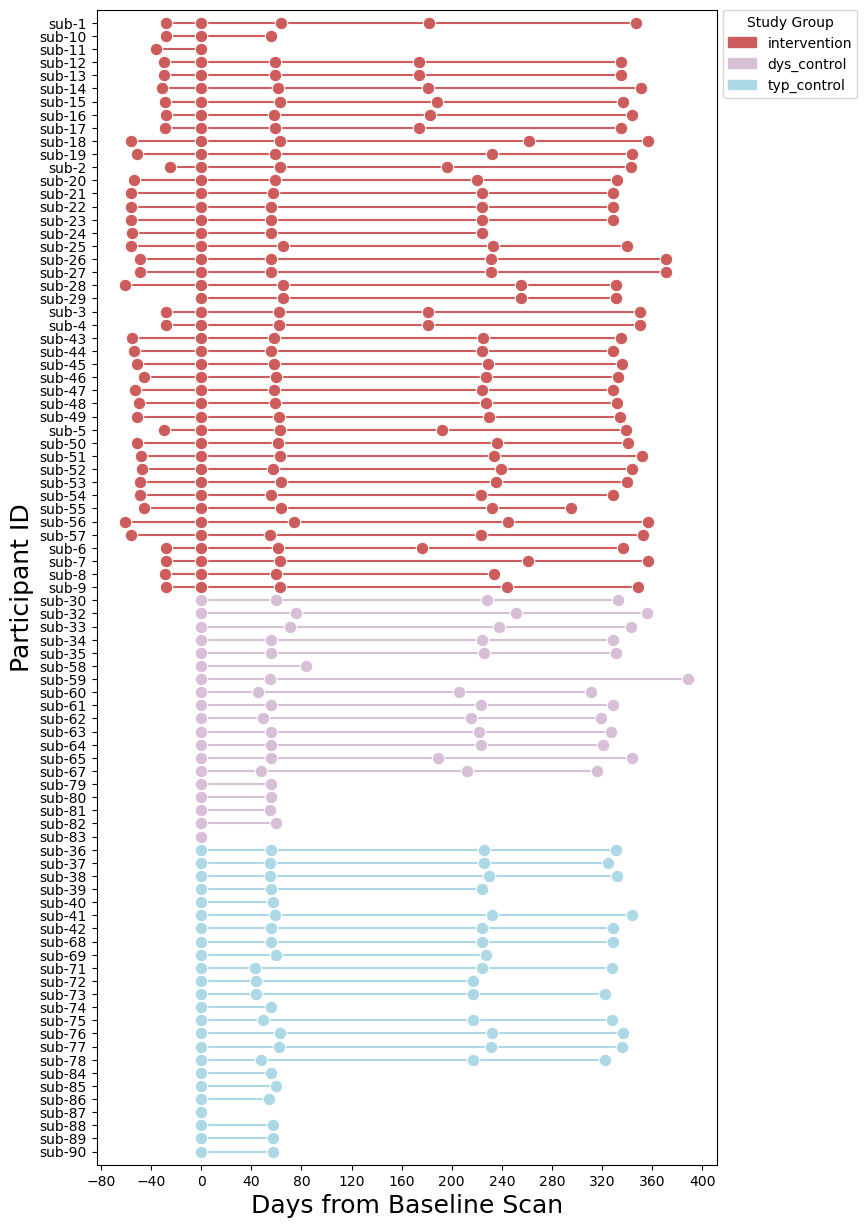

In [8]:
save_fig = False

# load data
dates = pd.read_csv(f'{data_dir}fig_s4.csv')

# Define color mapping for groups
group_palette = {'intervention': '#CD5C5C', 'dys_control': '#D8BFD8', 'typ_control': '#ADD8E6'}
text_color = 'black'

# Create a color mappings
dates['color'] = dates['study_group'].map(group_palette)  # Map the group to the color
sub_palette = dict(zip(dates['sub'], dates['color']))

fig, ax = plt.subplots(figsize =(8, 15))
sns.lineplot(data=dates, x='MRI_days_ses2', y='sub', hue='sub', marker='o', palette=sub_palette, markersize=9, legend=False, ax=ax)

# Add labels
plt.ylabel('Participant ID', fontsize=18,color=text_color)
plt.xlabel('Days from Baseline Scan', fontsize=18,color=text_color)

# Adjust tick font size
ax.tick_params(axis='both', which='major', labelsize=10,color=text_color)

# Set limits based on the number of unique participants
ax.set_ylim(-1, len(dates['sub'].unique()) - 0)

# Manually set x-axis ticks to include 0
x_min, x_max = dates['MRI_days_ses2'].min(), dates['MRI_days_ses2'].max()

# Create an array of evenly spaced tick marks and include 0
x_ticks = np.linspace(-80, 400, num=13)  # Adjust 'num' for more/less ticks

ax.set_xticks(x_ticks)
ax.tick_params(axis='x', colors=text_color)
ax.tick_params(axis='y', colors=text_color)

# Create custom legend
handles = [mpatches.Patch(color=color, label=group) for group, color in group_palette.items()]
ax.legend(handles=handles, title="Study Group", bbox_to_anchor=(1.01, 1), borderaxespad=0)

if save_fig:
    plt.savefig(f'{fig_dir}fig_s4.svg', bbox_inches="tight", transparent=True, dpi=400)

## Figure S5

In [12]:
# load fmriprep group qc data
df = pd.read_csv(f'{data_dir}fig_s5.csv')

# set inclusion thresholds
mean_fd_max = .5
perc_fd_max = 30

# apply inclusion critera
choices = [df['fd_mean'].lt(mean_fd_max) & df['fd_perc'].lt(perc_fd_max)]
df['good_run'] = np.select(choices,[1],default=0)

#creat new table with sumamry data of low motion runs
sum_tbl = df.pivot(columns='ses_num', values='good_run')
sum_tbl['sub'] = df['sub']
sum_tbl['study_group'] = df['study_group']
sum_tbl = sum_tbl.groupby(['sub','study_group']).sum(min_count=1)

# Define custom order for plotting
custom_order = {'intervention': 0, 'dys_control': 1, 'typ_control': 2}

# Sort the DataFrame by 'study_group' with custom order
sum_tbl.reset_index()
sum_tbl = sum_tbl.sort_values(by=['study_group','sub'], key=lambda x: x.map(custom_order))

#remove study_group level before plotting
sum_tbl = sum_tbl.droplevel(level='study_group',axis=0)

sum_tbl_plot = sum_tbl.astype(float)

sum_tbl_plot

ses_num,ses-1,ses-2,ses-3,ses-4,ses-5
sub,,,,,
sub-1,4.0,4.0,4.0,4.0,4.0
sub-10,2.0,1.0,NaN,NaN,NaN
sub-11,0.0,4.0,NaN,NaN,NaN
sub-12,3.0,4.0,3.0,4.0,4.0
sub-13,2.0,4.0,3.0,4.0,3.0
...,...,...,...,...,...
sub-86,NaN,4.0,4.0,NaN,NaN
sub-87,NaN,4.0,NaN,NaN,NaN
sub-88,NaN,4.0,4.0,NaN,NaN


In [ ]:
#plot
save_fig = True

fig, ax = plt.subplots(figsize=(5, 16))
sns.heatmap(sum_tbl_plot, annot=True, yticklabels=True, cbar=False)
plt.tight_layout()

if save_fig:
    fig.savefig(f'{fig_dir}fig_s5.svg', bbox_inches="tight", transparent=True, dpi=400)